## DummyVarriable and OneHotEncoding

#### Convert the categorical feature in to binary using dummy function()

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [52]:
cm = pd.get_dummies(df['Car Model'],drop_first=True)
cm

,BMW X5,Mercedez Benz C class
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,1


In [53]:
df = df.drop('Car Model',axis=1)
df

,Mileage,Sell Price($),Age(yrs)
0,69000,18000,6
1,35000,34000,3
2,57000,26100,5
3,22500,40000,2
4,46000,31500,4
5,59000,29400,5
6,52000,32000,5
7,72000,19300,6
8,91000,12000,8
9,67000,22000,6


In [54]:
df = pd.concat([cm,df],axis=1)
df

,BMW X5,Mercedez Benz C class,Mileage,Sell Price($),Age(yrs)
0,1,0,69000,18000,6
1,1,0,35000,34000,3
2,1,0,57000,26100,5
3,1,0,22500,40000,2
4,1,0,46000,31500,4
5,0,0,59000,29400,5
6,0,0,52000,32000,5
7,0,0,72000,19300,6
8,0,0,91000,12000,8
9,0,1,67000,22000,6


#### Select the Algorithm to build the Model

Text(0, 0.5, 'Sell Price($)')

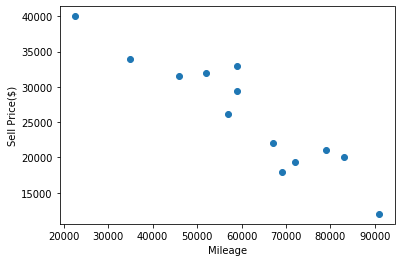

In [55]:
# Use scatterplot
plt.scatter(df.Mileage, df['Sell Price($)'])
plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')

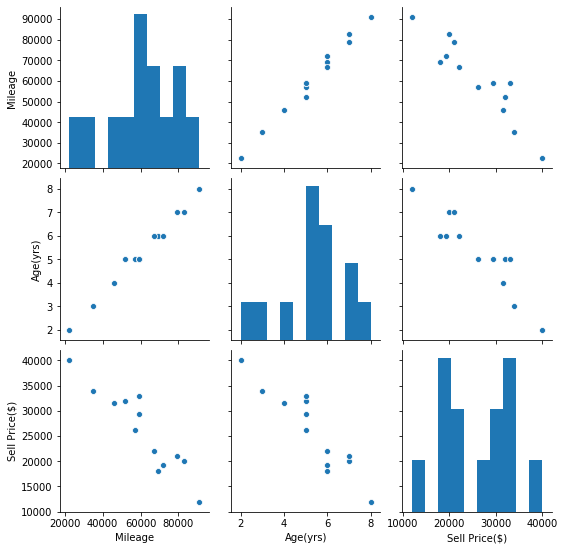

In [68]:
df1 = df[['Mileage','Age(yrs)','Sell Price($)']]
sns.pairplot(data=df1)

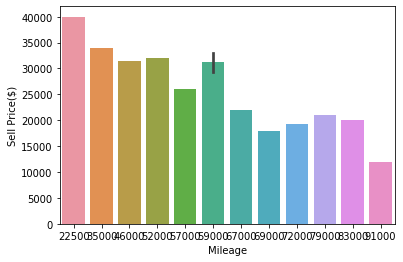

In [33]:
sns.barplot(df.Mileage, df['Sell Price($)'])

### Build the model using LinearRegression Algorithm

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model = LinearRegression()

In [38]:
X=df[['BMW X5','Mercedez Benz C class','Mileage','Age(yrs)']]
X

,BMW X5,Mercedez Benz C class,Mileage,Age(yrs)
0,1,0,69000,6
1,1,0,35000,3
2,1,0,57000,5
3,1,0,22500,2
4,1,0,46000,4
5,0,0,59000,5
6,0,0,52000,5
7,0,0,72000,6
8,0,0,91000,8
9,0,1,67000,6


In [41]:
y=df['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [42]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
model.predict([[0,1,45000,4]])

array([36991.31721062])

In [46]:
model.score(X,y)

0.9417050937281083

In [47]:
model.predict([[1,0,86000,7]])

array([11080.74313219])